In [2]:
# -*- coding: utf-8 -*- 
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the CICIDS2017 dataset. 
# implemented Advanced Ensemble techniques: Stacking 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt



# file_names = ['/home/ibibers@ads.iu.edu/Intrusion_Detection_System_IDS/IDS_Datasets/CICIDS2017_Dataset/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
#                '/home/ibibers@ads.iu.edu/Intrusion_Detection_System_IDS/IDS_Datasets/CICIDS2017_Dataset/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
#                  '/home/ibibers@ads.iu.edu/Intrusion_Detection_System_IDS/IDS_Datasets/CICIDS2017_Dataset/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',
#                  '/home/ibibers@ads.iu.edu/Intrusion_Detection_System_IDS/IDS_Datasets/CICIDS2017_Dataset/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv',
#                  '/home/ibibers@ads.iu.edu/Intrusion_Detection_System_IDS/IDS_Datasets/CICIDS2017_Dataset/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
#                  '/home/ibibers@ads.iu.edu/Intrusion_Detection_System_IDS/IDS_Datasets/CICIDS2017_Dataset/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
#                  '/home/ibibers@ads.iu.edu/Intrusion_Detection_System_IDS/IDS_Datasets/CICIDS2017_Dataset/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv',
#                  '/home/ibibers@ads.iu.edu/Intrusion_Detection_System_IDS/IDS_Datasets/CICIDS2017_Dataset/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv']

# dataframes = []

# for file_name in file_names:
#     df = pd.read_csv(file_name)
#     dataframes.append(df)

# # Concatenate all DataFrames into a single DataFrame
# combined_df = pd.concat(dataframes, ignore_index=True)
# # Save the combined DataFrame to a CSV file
# combined_df.to_csv('combined_dataset.csv', index=False)

# Load the dataset
df = pd.read_csv('/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/CICIDS2017_combined_dataset.csv')

# Drop duplicates: same observation but multiple occurences
main_df_1 = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value, the model wont learn form columns like this.
one_value = main_df_1.columns[main_df_1.nunique() == 1]
main_df_2 = main_df_1.drop(columns = one_value, axis=1)

# Fill nan values
main_df_2['Flow Bytes/s'] = main_df_2['Flow Bytes/s'].fillna(main_df_2['Flow Bytes/s'].mean())

# Remove leading space character in all feature names
main_df_2.rename(columns=lambda x: x.lstrip(), inplace=True)

# Checking numbers of missing values on the df
# main_df_2.isna().sum().sum()

sample_df_1 = main_df_2.copy()

# Extract subsample of data
print (" Extract subsample of data: ")
print (sample_df_1['Label'].value_counts())

 Extract subsample of data: 
Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [3]:
# Label encoding to convert categorical data to numerical data
le = LabelEncoder()
sample_df_1['Label'] = le.fit_transform(sample_df_1['Label'])

# Extract subsample of data
print (" Extract subsample of data: ")
print (sample_df_1['Label'].value_counts())

 Extract subsample of data: 
Label
0     2096484
4      172849
2      128016
10      90819
3       10286
7        5933
6        5385
5        5228
11       3219
1        1953
12       1470
14        652
9          36
13         21
8          11
Name: count, dtype: int64


In [4]:
# sample_df_1.shape
# sample_df_1.info()

# Take a random sample of the dataset
# sample_df_1 = sample_df_1.sample(frac=0.01, random_state=42)

print("Sampled Dataset Overview:")
# print(sample_df_2.head())
# print (sample_df_2.info())

dropped_df = ['Label', 'Flow Packets/s', 'Flow Bytes/s']
X = sample_df_1.drop( dropped_df, axis=1) 
y = sample_df_1['Label']  


Sampled Dataset Overview:


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier()
nn_model = MLPClassifier()
lr_model = LogisticRegression()
dst_model = DecisionTreeClassifier() 

# Print the number of samples before training
print("Number of samples before training:", len(X_train))

Number of samples before training: 2017889


In [6]:
# Train the models
rf_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
dst_model.fit(X_train, y_train)

# Print the number of samples after training
print("Number of samples after training:", len(X_train))

/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of samples after training: 2017889


In [7]:
# Make predictions models
rf_pred = rf_model.predict(X_test)
nn_pred = nn_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
dst_pred = dst_model.predict(X_test)

In [8]:
# Create a meta-model (e.g., Logistic Regression)
meta_model = DecisionTreeClassifier()
# meta_model = LogisticRegression()
# meta_model = MLPClassifier()
# meta_model = RandomForestClassifier()

In [9]:
# Stack models using StackingClassifier
stacked_model = StackingClassifier(estimators=[
    ('rf', rf_model),
    ('nn', nn_model),
    ('lr', lr_model),
    ('dst', dst_model),
    # ('svm', svm_model)
], final_estimator=meta_model)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions with the stacked model
stacked_pred__encoded = stacked_model.predict(X_test)

/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [10]:
# Convert the encoded labels to the original labels by using inverse_transform 
y_pred = le.inverse_transform(stacked_pred__encoded)
y_test_labels = le.inverse_transform(y_test)

# Create a mapping between numerical labels and their corresponding real labels
label_mapping = {label: le.inverse_transform([label])[0] for label in set(y_test)}
print (label_mapping)

{0: 'BENIGN', 1: 'Bot', 2: 'DDoS', 3: 'DoS GoldenEye', 4: 'DoS Hulk', 5: 'DoS Slowhttptest', 6: 'DoS slowloris', 7: 'FTP-Patator', 8: 'Heartbleed', 9: 'Infiltration', 10: 'PortScan', 11: 'SSH-Patator', 12: 'Web Attack � Brute Force', 13: 'Web Attack � Sql Injection', 14: 'Web Attack � XSS'}


In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9971950927006995


In [12]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    419148
                       Bot       0.77      0.84      0.80       403
                      DDoS       1.00      1.00      1.00     25498
             DoS GoldenEye       1.00      1.00      1.00      2032
                  DoS Hulk       1.00      1.00      1.00     34853
          DoS Slowhttptest       0.98      0.93      0.96      1038
             DoS slowloris       0.99      0.99      0.99      1085
               FTP-Patator       1.00      1.00      1.00      1160
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       0.50      0.75      0.60         4
                  PortScan       0.99      0.97      0.98     18187
               SSH-Patator       1.00      1.00      1.00       633
  Web Attack � Brute Force       0.70      0.65      0.67       294
Web Attack � Sql Inject

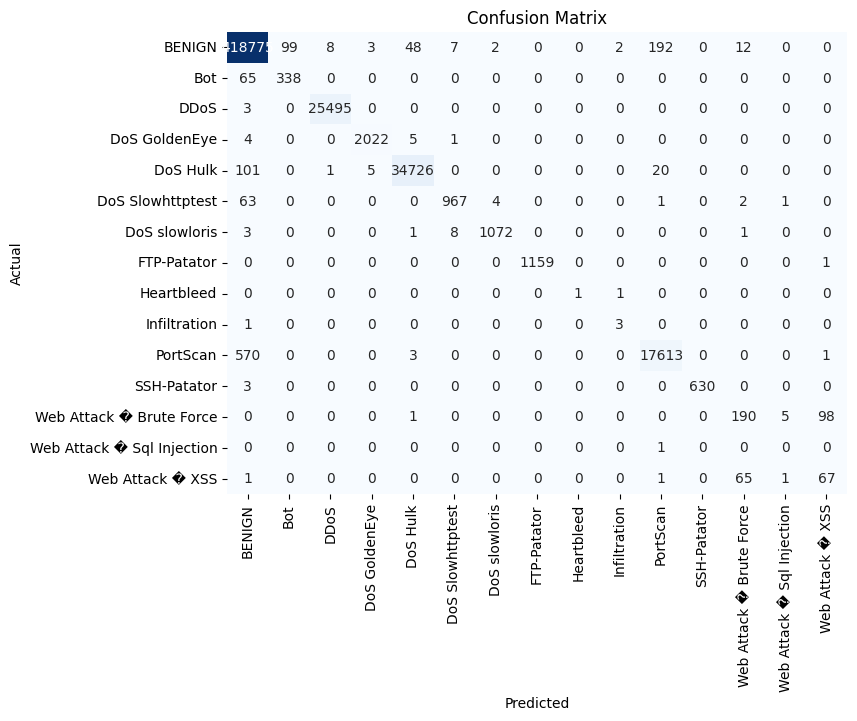

In [13]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test_labels, y_pred , labels = le.classes_)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,  xticklabels=le.classes_.tolist(), yticklabels=le.classes_.tolist()) 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipykernel_2304067/3567953096.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='mako')


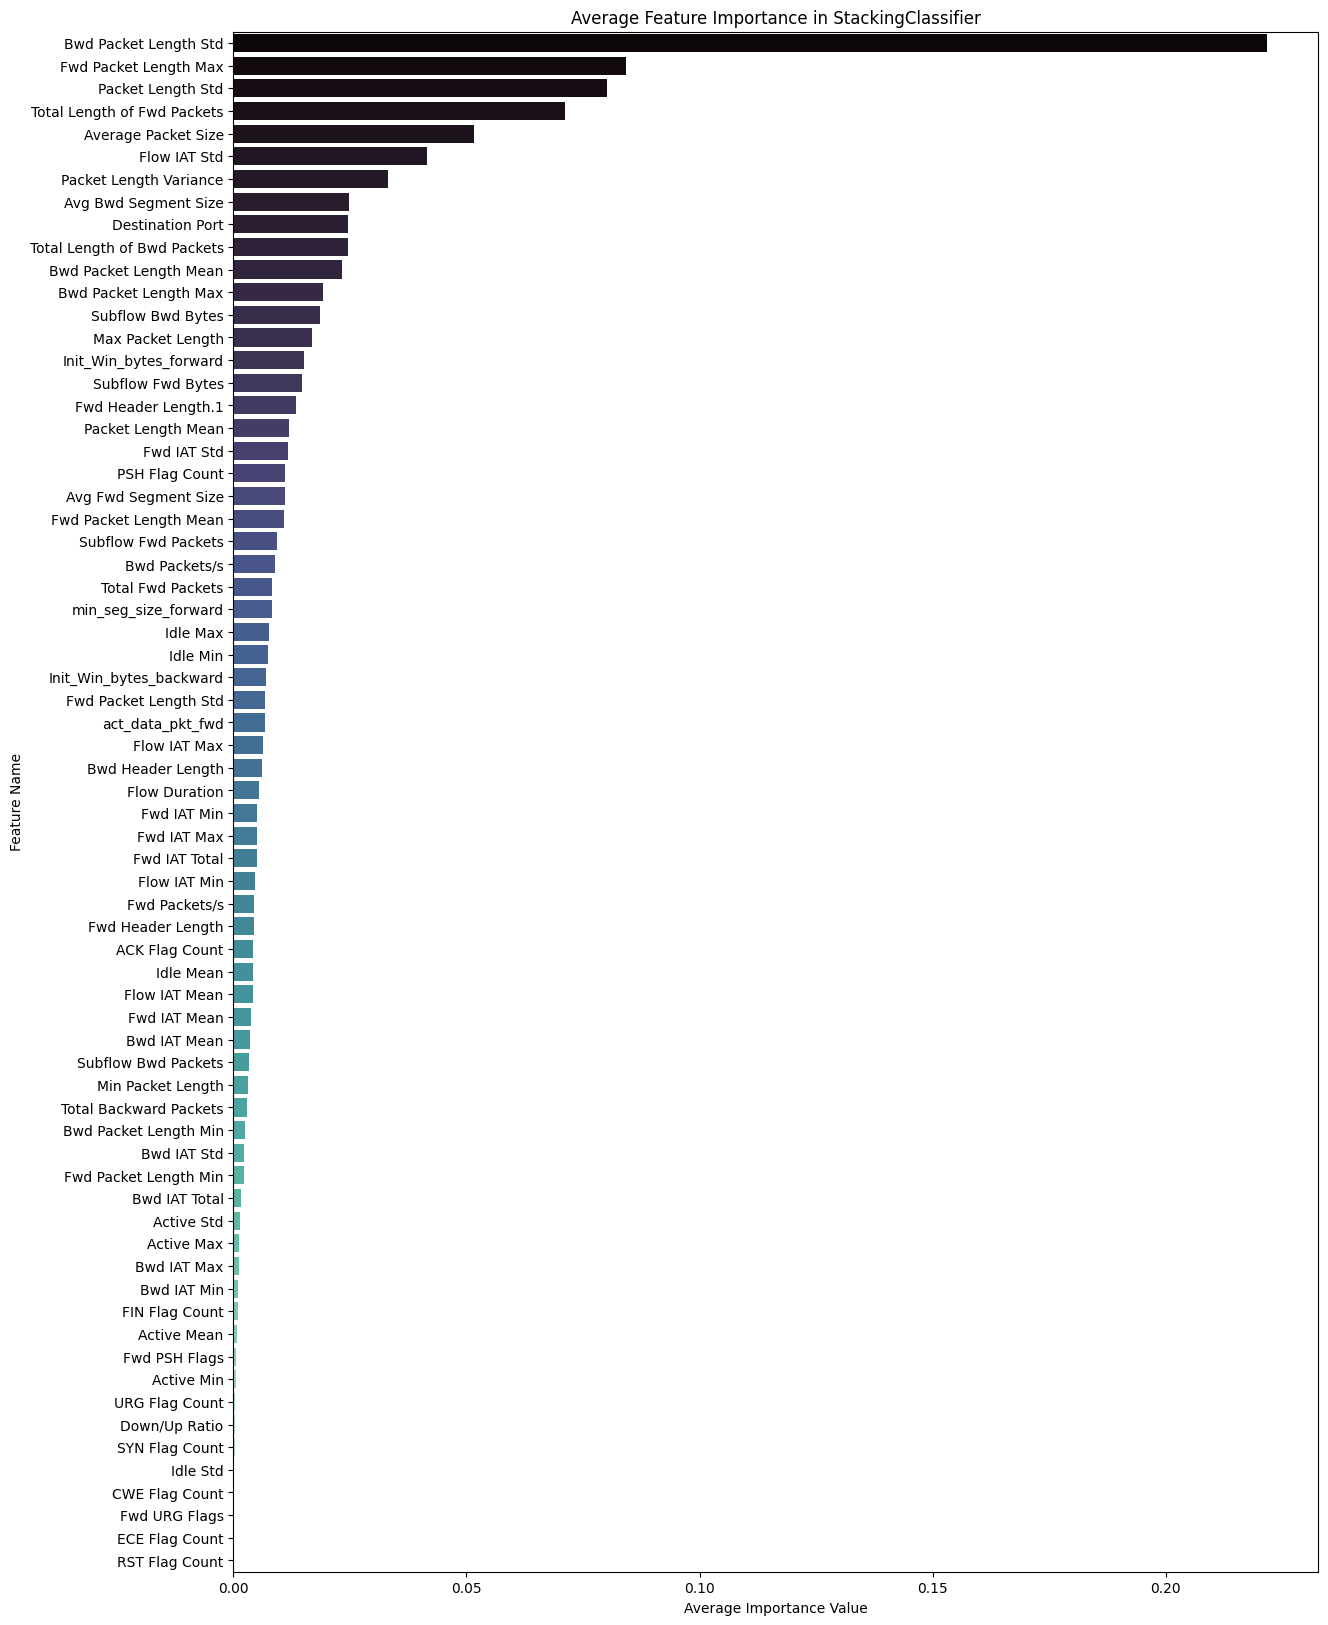

In [14]:
# Extract feature importances from base models 
base_models_importances = {}

for name, model in stacked_model.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):
        base_models_importances[name] = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame(base_models_importances, index=X.columns)

# Calculate average feature importance across base models
average_importance = importance_df.mean(axis=1)

# Sort features by average importance
sorted_importance = average_importance.sort_values(ascending=False)

# Visualize the feature importances
plt.figure(figsize=(14, 20))
sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='mako')
plt.xlabel('Average Importance Value')
plt.ylabel('Feature Name')
plt.title('Average Feature Importance in StackingClassifier')
plt.show()